In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmap

import timeit
import subprocess as subp

FGsize = (6,6)

<IPython.core.display.Javascript object>


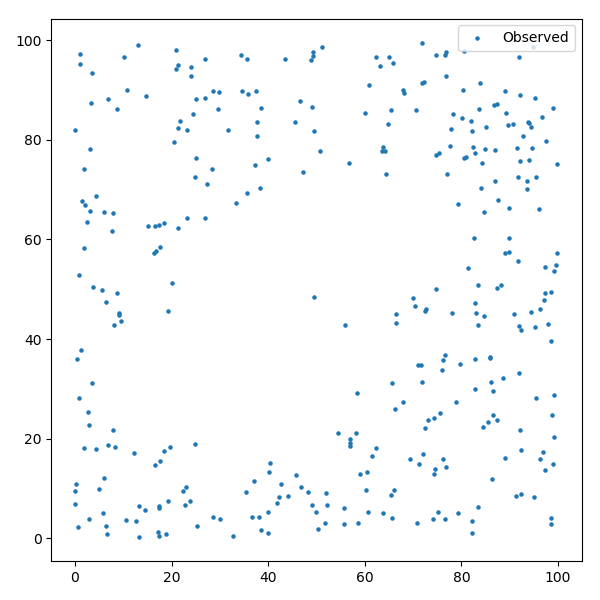

In [2]:
OC = np.loadtxt("observed_catalogs/oc.dat")

# z cut
Z_c = [50]

Xo = OC[:,0]
Yo = OC[:,1]
Zo = OC[:,2]

for z in Z_c:
    index = np.where( abs(Zo-z) < 5 )

    fig = plt.figure(figsize=FGsize)
    plt.scatter(Xo[index], Yo[index], s=5, label="Observed")
    plt.legend(loc="upper right")

plt.tight_layout()
fig.savefig("figures/toy_model_OC-slice.pdf")

# Nothing Here

<IPython.core.display.Javascript object>


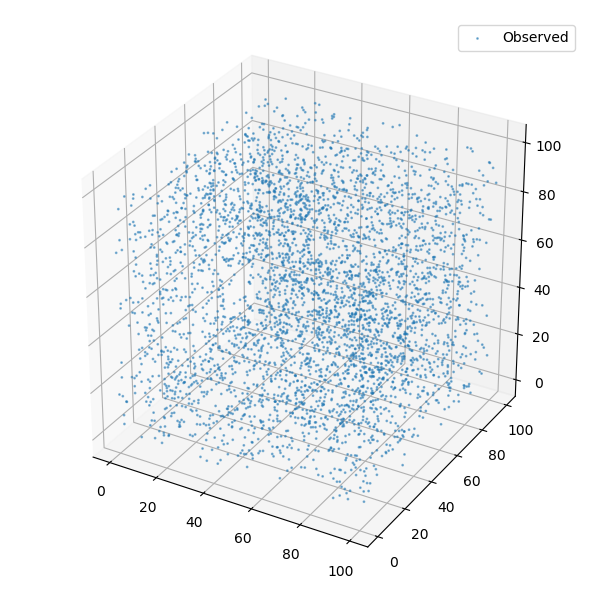

In [3]:
fig = plt.figure(figsize=FGsize)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xo,Yo,Zo, s=1, alpha=0.5, label="Observed")

ax.set_aspect(1)
ax.legend(loc=1)

plt.tight_layout()
fig.savefig("figures/toy_model_OC-3d.pdf")

<IPython.core.display.Javascript object>


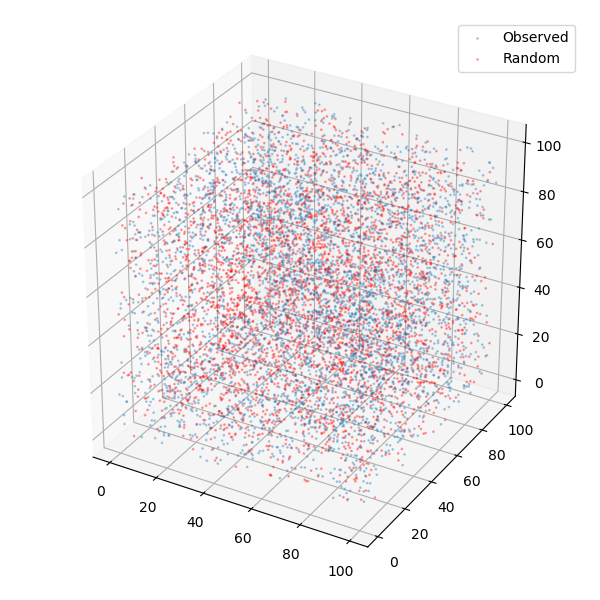

In [4]:
def gen_random():
    L = 100
    x = np.random.rand() * L
    y = np.random.rand() * L
    z = np.random.rand() * L
    
    return [x,y,z]

np.random.seed(0)
RC = []
for i in range(OC.shape[0]):
    RC.append(gen_random())   
RC = np.array(RC)
np.savetxt( "random_catalogs/1.cat", RC)

Xr = RC[:,0]
Yr = RC[:,1]
Zr = RC[:,2]



fig = plt.figure(figsize=FGsize)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xo,Yo,Zo, s=1, alpha=0.3, label="Observed")
ax.scatter(Xr,Yr,Zr, s=1, c="r", alpha=0.3, label="Random")

ax.set_aspect(1)
ax.legend(loc=0)

plt.tight_layout()
fig.savefig("figures/toy_model_OC+RC-3d.pdf")

<IPython.core.display.Javascript object>


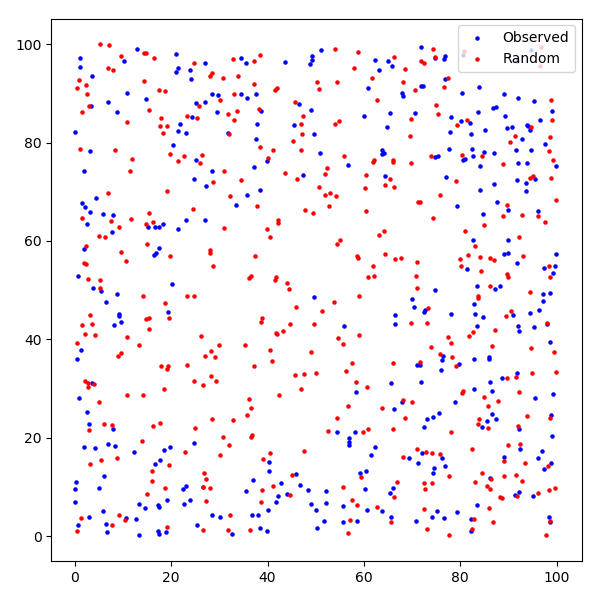

In [5]:
def SCATTER_3d( cat1 , *args):    
    X1 = cat1[:,0]
    Y1 = cat1[:,1]
    Z1 = cat1[:,2]

    if(len(args)>=1):
        cat2 = args[0]
        X2 = cat2[:,0]
        Y2 = cat2[:,1]
        Z2 = cat2[:,2]

    if(len(args)>=2):
        cat3 = args[1]
        X3 = cat3[:,0]
        Y3 = cat3[:,1]
        Z3 = cat3[:,2]     
        
    

    fig = plt.figure(figsize=FGsize)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect(1)
    
    ax.scatter(X1, Y1, Z1, s=5, c="b", alpha=0.2)
    if(len(args)>=1):
        ax.scatter(X2, Y2, Z2, s=5, c="r", alpha=0.2)
    if(len(args)>=2):
        ax.scatter(X3, Y3, Z3, s=15, c="b", alpha=1)
        
def PLOT_SLICE_OF_CAT( cat1 , *args):
    
    slice_tickness = 10

    Z_c = [50]
    
    X1 = cat1[:,0]
    Y1 = cat1[:,1]
    Z1 = cat1[:,2]

    if(len(args)>=1):
        cat2 = args[0]
        X2 = cat2[:,0]
        Y2 = cat2[:,1]
        Z2 = cat2[:,2]

    if(len(args)>=2):
        cat3 = args[1]
        X3 = cat3[:,0]
        Y3 = cat3[:,1]
        Z3 = cat3[:,2]        

    for z in Z_c:
        fig = plt.figure(figsize=FGsize)
        
        index_1 = np.where( abs(Z1-z) < slice_tickness )
        plt.scatter(X1[index_1],  Y1[index_1], s=1, c="b")
        
        if(len(args)>=1):        
            index_2 = np.where( abs(Z2-z) < slice_tickness )
            plt.scatter(X2[index_2],  Y2[index_2], s=1, c="r")        

        if(len(args)>=2):        
            index_3 = np.where( abs(Z3-z) < slice_tickness )
            plt.scatter(X3[index_3],  Y3[index_3], s=15, c="g")        

            

slice_tickness = 5
Z_c = [50]


for z in Z_c:
    fig = plt.figure(figsize=FGsize)
    index_1 = np.where( abs(Zo-z) < slice_tickness)
    index_2 = np.where( abs(Zr-z) < slice_tickness)
    
    plt.scatter( Xo[index_1], Yo[index_1], s = 5, c="blue", label="Observed")
    plt.scatter( Xr[index_2], Yr[index_2], s = 5, c="red", label="Random")

    plt.legend(loc=1)
    
    plt.tight_layout()
    fig.savefig("figures/toy_model_OC+RP-slice.pdf")

In [6]:
FC = np.vstack([RC,OC])

print(FC.shape)
print(RC.shape)
np.savetxt("full_catalogs/1.cat", FC)

(8366, 3)
(4183, 3)


In [7]:
OC_FILE_IN = "oc.dat"
FILENUM = "1"
BETA = 1.0
nrand = 1.0

prog = "progress.txt"


### Paths
RC_path = "random_catalogs/"
FC_path = "full_catalogs/"
OC_path = "observed_catalogs/"
BS_path = "xdl_beta_skeleton/"
ML_path = "masterlists/"
FG_path = "figures/"
VE_path = "volume_and_excentricity/"

OC_filename = OC_FILE_IN
FC_filename = "{}.cat".format(FILENUM)
RC_filename = "{}.cat".format(FILENUM)
BS_filename = "{}.BSKIndex".format(FILENUM)
ML_filename = "{}.mls".format(FILENUM)
FG_filename = "{}".format(FILENUM)
VE_filename = "{}.vae".format(FILENUM)

beta = BETA
n_rand = nrand

In [8]:
subp.run("LSS_BSK_calc -input  " + FC_path + FC_filename +
             " -output " + str(FILENUM) +
             " -beta " + str(BETA) +
             " -printinfo True -numNNB 300"
             , shell=True, check=True)



CompletedProcess(args='LSS_BSK_calc -input  full_catalogs/1.cat -output 1 -beta 1.0 -printinfo True -numNNB 300', returncode=0)

!LSS_BSK_calc -input  $FC_path$FC_filename -output $FILENUM -beta $BETA -printinfo True -numNNB 300 

In [9]:
#################################################################
#                                                               #
#                    Void Finder Main Loop                      #
#                                                               #
#################################################################
beta = BETA
n_rand = nrand
toc = timeit.default_timer()
subp.run( "echo  Finding voids in {} >> {}".format(OC_FILE_IN, prog), shell=True, check=True)

InitialMessage  = "\n\n\n #########################################################"
InitialMessage += "\n\n Running with:\n"
InitialMessage += "\n\t n_rand = {}".format(n_rand)
InitialMessage += "\n\t beta   = {}".format(beta)

print(InitialMessage)
print(" Using this files:\n\t{}\n\t{}\n\t{}\n\t{}".format(RC_filename,FC_filename,BS_filename,OC_filename,ML_filename))

RC    = np.loadtxt(RC_path + RC_filename)
OC    = np.loadtxt(OC_path + OC_filename)
FC    = np.loadtxt(FC_path + FC_filename)
BS    = np.loadtxt(BS_path + BS_filename)

N_rnd = RC.shape[0]
N_obs = OC.shape[0]

print(" Reading Full Catalogs and Beta-Skeleton from:\n\t{}\n\t{}".format(FC_filename,BS_filename))
print(" Previous BetaSkeleton Shape before Stacking: ", BS.shape)

### Transforms Xiao-Dong Li's Beta Skeleton Index to long list

a = BS[:,0].astype(int)
a = list(a)
b = BS[:,1].astype(int)
b = list(b)

c = []
c.extend(a)
c.extend(b)
d = []
d.extend(b)
d.extend(a)

c = np.array(c, dtype=int)
d = np.array(d, dtype=int)

fcBSkel = np.vstack((c,d)).T





 #########################################################

 Running with:

	 n_rand = 1.0
	 beta   = 1.0
 Using this files:
	1.cat
	1.cat
	1.BSKIndex
	oc.dat
 Reading Full Catalogs and Beta-Skeleton from:
	1.cat
	1.BSKIndex
 Previous BetaSkeleton Shape before Stacking:  (31104, 2)


<IPython.core.display.Javascript object>


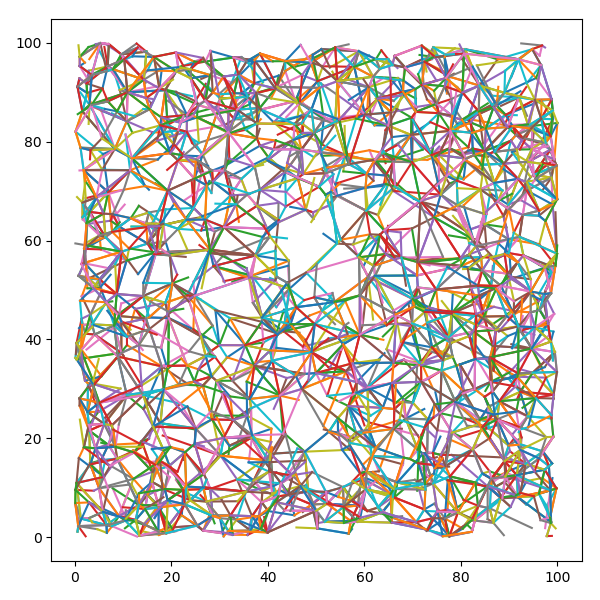

In [10]:
# To plot a Slice of the Full Catalog Beta-Skeleton connections 

index_pl_fcbskel = np.where( abs( FC[fcBSkel[:,0],2] - Z_c) < slice_tickness )[0]

bskel_init_x = FC[fcBSkel[index_pl_fcbskel,0],0]
bskel_init_y = FC[fcBSkel[index_pl_fcbskel,0],1]

bskel_end_x = FC[fcBSkel[index_pl_fcbskel,1],0]
bskel_end_y = FC[fcBSkel[index_pl_fcbskel,1],1]



slice_tickness = 5    # remember, the box goes from 0 to 100.
Z_c = [50]            # Z_central

for z in Z_c:
    fig = plt.figure(figsize=FGsize)
    index_1 = np.where( abs(Zo-z) < slice_tickness)
    index_2 = np.where( abs(Zr-z) < slice_tickness)

    plt.plot([bskel_init_x, bskel_end_x], [bskel_init_y, bskel_end_y])
    
    plt.tight_layout()
    fig.savefig("figures/toy_model_fcBSkel-slice.pdf")


In [11]:
print("Next BetaSkeleton Shape after Stacking: ", fcBSkel.shape)

### Search for the first N_rnd points in the FC.

# Find RANDOM POINTS in the fcBeta-Skeleton Graph.
first_filter_index = np.where(fcBSkel[:,0] < N_rnd)  
    
# Store the partial Beta-Skeleton Graph of Random Points and
# its connections. They may have connections with Obs. points
# and other Random points.
first_filter_BSkel = np.array(fcBSkel[first_filter_index]).astype(int)

# Find the Random Points connected only to Random Points.

# To do this, first we find those points whom are connected to 
# observational points.
second_filter_index = np.where( first_filter_BSkel[:,1] >= N_rnd )[0]
    
# They are going to be dropped.
particle_ID_to_drop = first_filter_BSkel[second_filter_index,0]
particle_ID_to_drop.sort()
# A set of the Random Points connected to Observational points
# is created, there are not repeated items.
droplist = set(particle_ID_to_drop)

print( "First filter shape:", first_filter_BSkel.shape, 
       "\nHow many of them have direct connections"+
       " with galaxies (i.e. droplist length)", 
       len(droplist),
       "\nThen, must survive", len(set(first_filter_BSkel[:,0])) -len(droplist), 
       "trueVoidPoints")

# We have the Random points set:
# Maybe not all Random Particles are connected to the Skeleton. (large Beta)
# Because of this, we doesn't take into account something like
# Points_in_Skeleton = range(0,N_rnd).


print('Checking Random Points in the Beta Skeleton')
Points_in_Skeleton = set(first_filter_BSkel[:,0])
print('Random Points in Beta Skeleton Checked') 

# and the droplist. The complement(difference) is the
# pure void points set.



Next BetaSkeleton Shape after Stacking:  (62208, 2)
First filter shape: (31363, 2) 
How many of them have direct connections with galaxies (i.e. droplist length) 3811 
Then, must survive 372 trueVoidPoints
Checking Random Points in the Beta Skeleton
Random Points in Beta Skeleton Checked


In [12]:
print('')
trueVoidPointsIndex = Points_in_Skeleton.difference(droplist)
# This set is converted to list, it will be used as an index to find 
# True Voids.
trueVoidPointsIndex = list(trueVoidPointsIndex)
trueVoidPointsIndex.sort()

# This is the first definition of TRUE VOID POINTS.
# Catalog of particles in voids
void_cat = FC[trueVoidPointsIndex]

### True Voids have been foud. #########################################
########################################################################



In [13]:
### Looking for the connections of the TrueVoidPoints
    
index=[]
for k in trueVoidPointsIndex:
    #index.extend( list( np.where( (fcBSkel[:,0] == k) &
    #                             (fcBSkel[:,1] > k))[0].astype(int) ) )
    
    index.extend( list( np.where( (fcBSkel[:,0] == k))[0].astype(int) ) )
    
    
    index = list(set(index ) )
    index.sort()
#DEBUG
#print(fcBSkel[index])
#print(fcBSkel[index].shape)



In [14]:
# Beta-Skeleton of TrueVoidPoints (includes Frontier Points)
VoidsBS = np.array(fcBSkel[index]).astype(int)
trueVoidPointsIndex.sort()
    
print(" Void BetaSkeleton Shape: ", VoidsBS.shape)
print(" The len of trueVoidPointsIndex", len(trueVoidPointsIndex))

 Void BetaSkeleton Shape:  (2723, 2)
 The len of trueVoidPointsIndex 372


In [15]:
### The list of All (random) Void Points
#
# Each TrueVoidPoint_index is checked, and their connections.
# They are random points connected to galaxies and other random
# points.

VoidPoints = []

for truepoint in trueVoidPointsIndex:
    aux = [truepoint]
    
    index = np.where(VoidsBS[:,0] == truepoint)[0]
    aux.extend(list(VoidsBS[index,1]))
    aux.sort()
    VoidPoints.extend(aux)

VoidPoints = list(set(VoidPoints))
VoidPoints.sort()

VoidPoints = np.array(VoidPoints).astype(int)

trueVoidPointsIndex = np.array(trueVoidPointsIndex).astype(int)

<IPython.core.display.Javascript object>


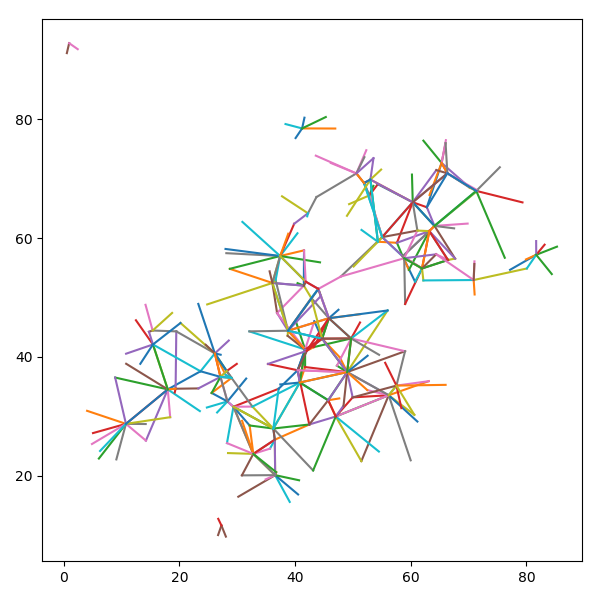

In [16]:
# To plot a Slice of the True Voids Beta-Skeleton connections 

index_pl_tvbskel = np.where( abs( FC[VoidsBS[:,0],2] - Z_c) < slice_tickness )[0]

bskel_init_x = FC[VoidsBS[index_pl_tvbskel,0],0]
bskel_init_y = FC[VoidsBS[index_pl_tvbskel,0],1]

bskel_end_x = FC[VoidsBS[index_pl_tvbskel,1],0]
bskel_end_y = FC[VoidsBS[index_pl_tvbskel,1],1]


for z in Z_c:
    fig = plt.figure(figsize=FGsize)
    index_1 = np.where( abs(Zo-z) < slice_tickness)
    index_2 = np.where( abs(Zr-z) < slice_tickness)

    plt.plot([bskel_init_x, bskel_end_x], [bskel_init_y, bskel_end_y])

    plt.tight_layout()
    fig.savefig("figures/toy_model_truevoidsBSkel-slice.pdf")

In [17]:
iscounted = np.zeros([len(trueVoidPointsIndex)], dtype=int)

PRINTME = False

def neighbours(ID):
    

    # IDin: Index of the void particle #ID in the list of VoidPoints
    IDin = np.where(trueVoidPointsIndex == ID)[0]
    
    neigh = []
    
    if PRINTME:
        print(ID, IDin, iscounted[IDin])
    
    if IDin.size == 0:
        iscounted[IDin] += 1
        if PRINTME:
            print("\t Is not a TrueVoidPoint")
        return neigh


    if PRINTME:
        print("\t TrueVoidPoint OK")

    
    if iscounted[IDin]:
        if PRINTME:
            print("\t It has been counted. Skip")
        return neigh
    
    
    else:
        if PRINTME:
            print("\t Not Counted. OK")
        iscounted[IDin] += 1               

    
        neigh = [ID]
        
        index = np.where(VoidsBS[:,0] == ID)[0]
        
        if PRINTME:
            print(ID, "BetaSkeleton\n", VoidsBS[index])
        
        friends = list(VoidsBS[index,1])
        friends.sort()     
        
        
        for friend in friends:      
            neigh.append(friend)
            neigh.extend(neighbours(friend))
        
        if PRINTME:
            print("\t Neigbours of:", ID, neigh)
        return neigh

In [18]:
VOIDS = []

VPlen = len(trueVoidPointsIndex)

for ID in trueVoidPointsIndex:
    index = np.where(trueVoidPointsIndex==ID)[0]
    print("Progress: {:04.2f}%".format(100.0*index[0]/VPlen))
    candidate = neighbours(ID)
    candidate = list(set(candidate))
    candidate.sort()
    if len(candidate) > 0:
        VOIDS.append(candidate)

Progress: 0.00%
Progress: 0.27%
Progress: 0.54%
Progress: 0.81%
Progress: 1.08%
Progress: 1.34%
Progress: 1.61%
Progress: 1.88%
Progress: 2.15%
Progress: 2.42%
Progress: 2.69%
Progress: 2.96%
Progress: 3.23%
Progress: 3.49%
Progress: 3.76%
Progress: 4.03%
Progress: 4.30%
Progress: 4.57%
Progress: 4.84%
Progress: 5.11%
Progress: 5.38%
Progress: 5.65%
Progress: 5.91%
Progress: 6.18%
Progress: 6.45%
Progress: 6.72%
Progress: 6.99%
Progress: 7.26%
Progress: 7.53%
Progress: 7.80%
Progress: 8.06%
Progress: 8.33%
Progress: 8.60%
Progress: 8.87%
Progress: 9.14%
Progress: 9.41%
Progress: 9.68%
Progress: 9.95%
Progress: 10.22%
Progress: 10.48%
Progress: 10.75%
Progress: 11.02%
Progress: 11.29%
Progress: 11.56%
Progress: 11.83%
Progress: 12.10%
Progress: 12.37%
Progress: 12.63%
Progress: 12.90%
Progress: 13.17%
Progress: 13.44%
Progress: 13.71%
Progress: 13.98%
Progress: 14.25%
Progress: 14.52%
Progress: 14.78%
Progress: 15.05%
Progress: 15.32%
Progress: 15.59%
Progress: 15.86%
Progress: 16.13%
P

In [19]:
index = np.where(trueVoidPointsIndex==ID)[0]
print(index)

[371]


In [20]:
len(VOIDS)

41

In [21]:
iscounted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib/39168267#39168267

In [22]:
n = []
for void in VOIDS:
    n.append(len(void))

<IPython.core.display.Javascript object>


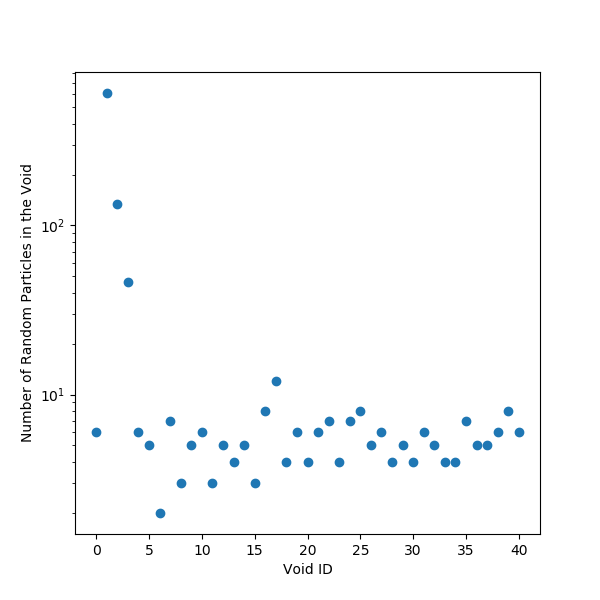

In [23]:
fig = plt.figure(figsize=FGsize)
plt.scatter(range(len(n)), n)
plt.yscale("log")
plt.xlabel("Void ID")
plt.ylabel("Number of Random Particles in the Void")
plt.show()

In [24]:
MasterList = VOIDS

#################################################################
#                                                               #
#                Store the Void Masterlist                      #
#                                                               #
#################################################################

X = RC[:,0]
Y = RC[:,1]
Z = RC[:,2]

Xv = void_cat[:,0]
Yv = void_cat[:,1]
Zv = void_cat[:,2]


<IPython.core.display.Javascript object>


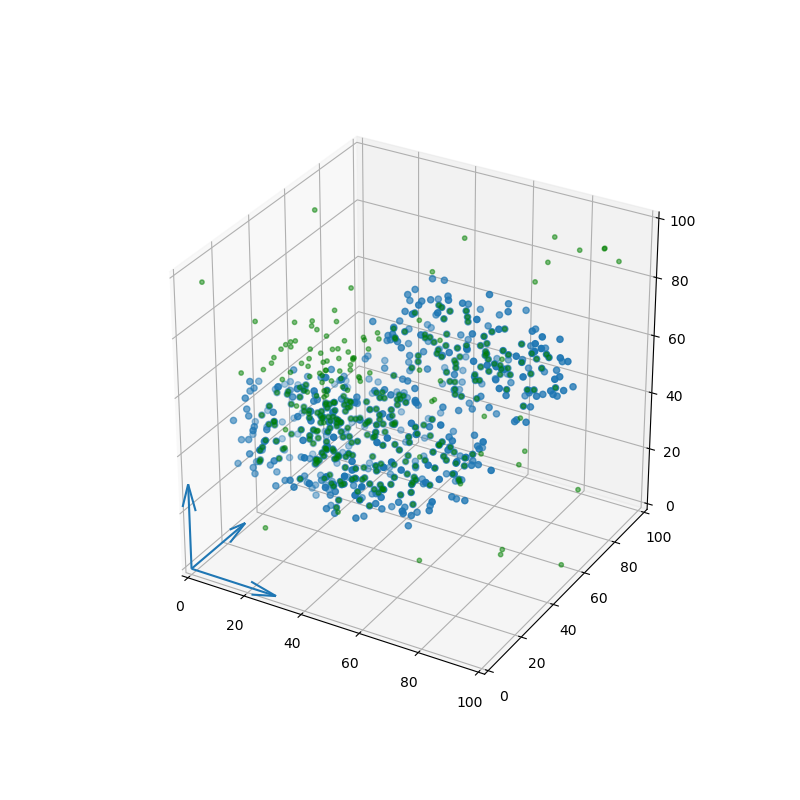

<IPython.core.display.Javascript object>


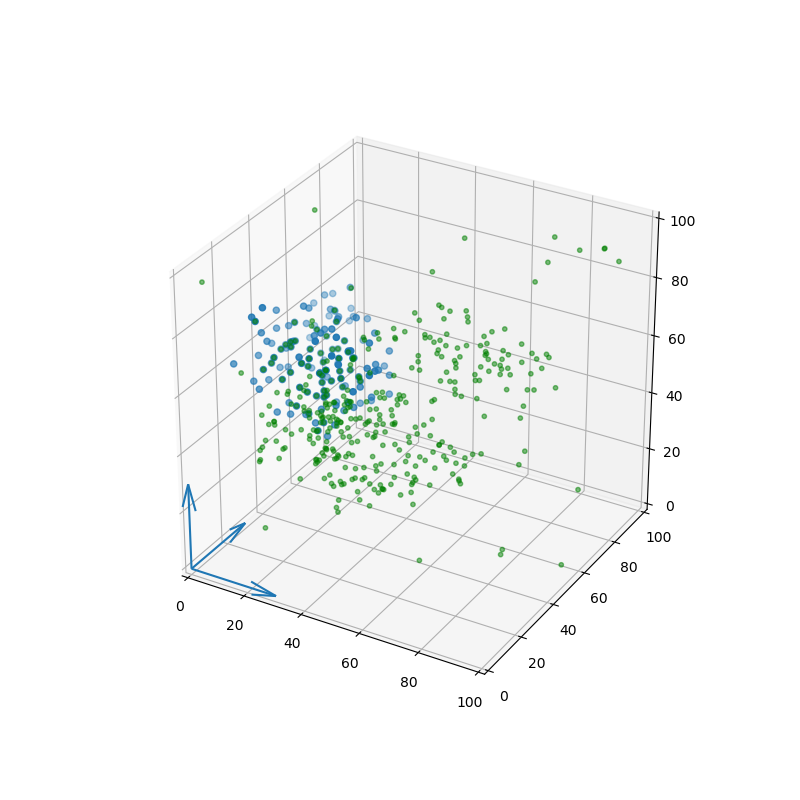

<IPython.core.display.Javascript object>


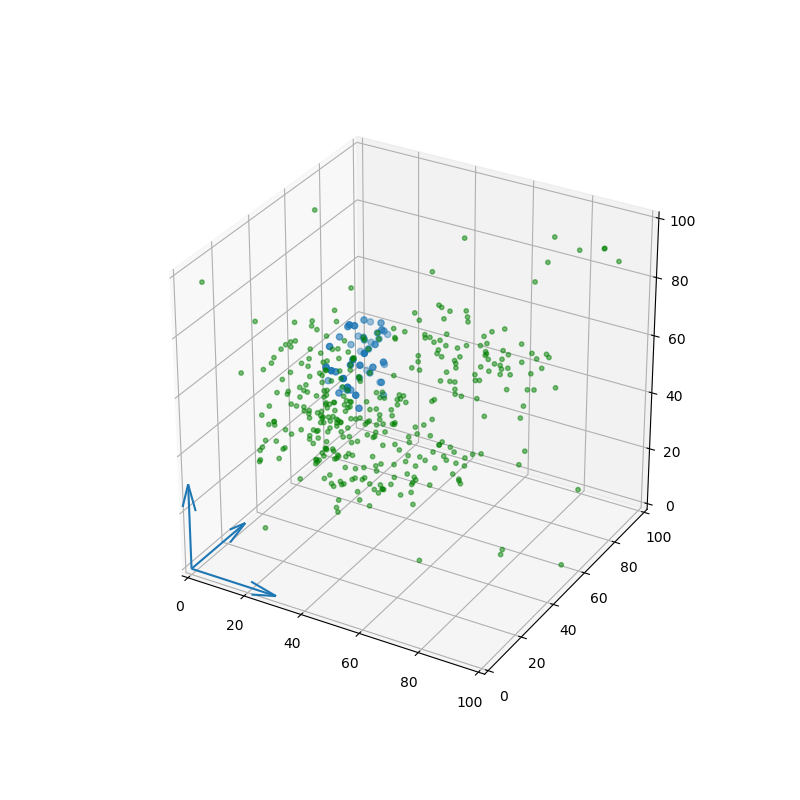

<IPython.core.display.Javascript object>


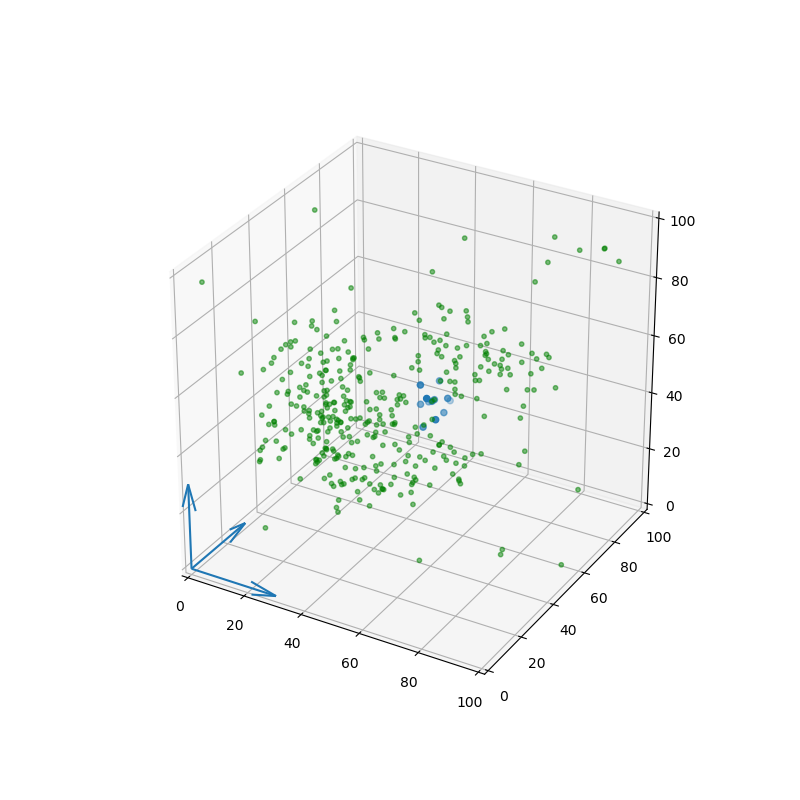

In [25]:
MLlen = len(MasterList)




for i in range(MLlen):
    Void = MasterList[i]
    N = len(Void)

    if(N>10): # at least 8 particles per void

        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111, projection='3d')
        
        ax.quiver(0,0,0,100,0,0, length=0.3)
        ax.quiver(0,0,0,0,100,0, length=0.3)
        ax.quiver(0,0,0,0,0,100, length=0.3)
        
        
        
        
        colorin = i * np.ones(N)
        ax.scatter(Xv, Yv, Zv, c="green", s=10, alpha=0.5, label="True Void Points")
        ax.scatter(X[Void], Y[Void], Z[Void], cmap=cmap.gist_ncar)
        ax.set_xlim(0,100)
        ax.set_ylim(0,100)
        ax.set_zlim(0,100)
        #plt.savefig( FG_path+"recursion2_{}.png".format(i))
        #plt.close()
    

In [26]:
MLlen

41

<IPython.core.display.Javascript object>


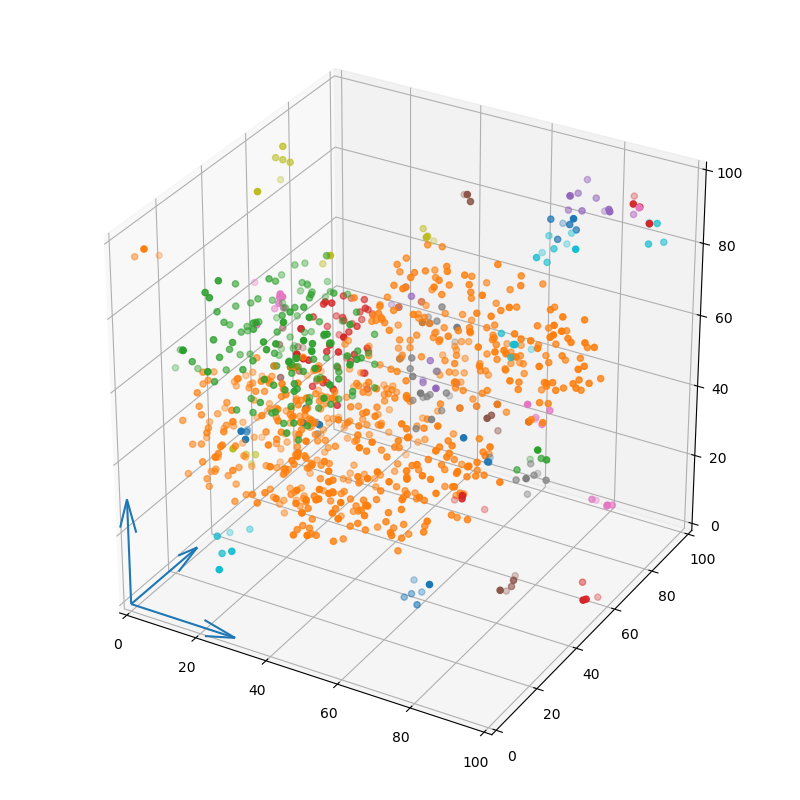

In [27]:
MLlen = len(MasterList)

# 3d Scatter Plot of all identified voids

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0,0,0,100,0,0, length=0.3)
ax.quiver(0,0,0,0,100,0, length=0.3)
ax.quiver(0,0,0,0,0,100, length=0.3)

for i in range(MLlen):
    Void = MasterList[i]
    N = len(Void)

    if(N>1): # at least 8 particles per void
        colorin = i * np.ones(N)
        #ax.scatter(Xv, Yv, Zv, c="green", s=10, alpha=0.5, label="True Void Points")
        ax.scatter(X[Void], Y[Void], Z[Void], cmap=cmap.gist_ncar)
        ax.set_xlim(0,100)
        ax.set_ylim(0,100)
        ax.set_zlim(0,100)
        
        #plt.close()
        
plt.tight_layout()
plt.savefig( FG_path+"recursion2_all_identified_voids.pdf")

<IPython.core.display.Javascript object>


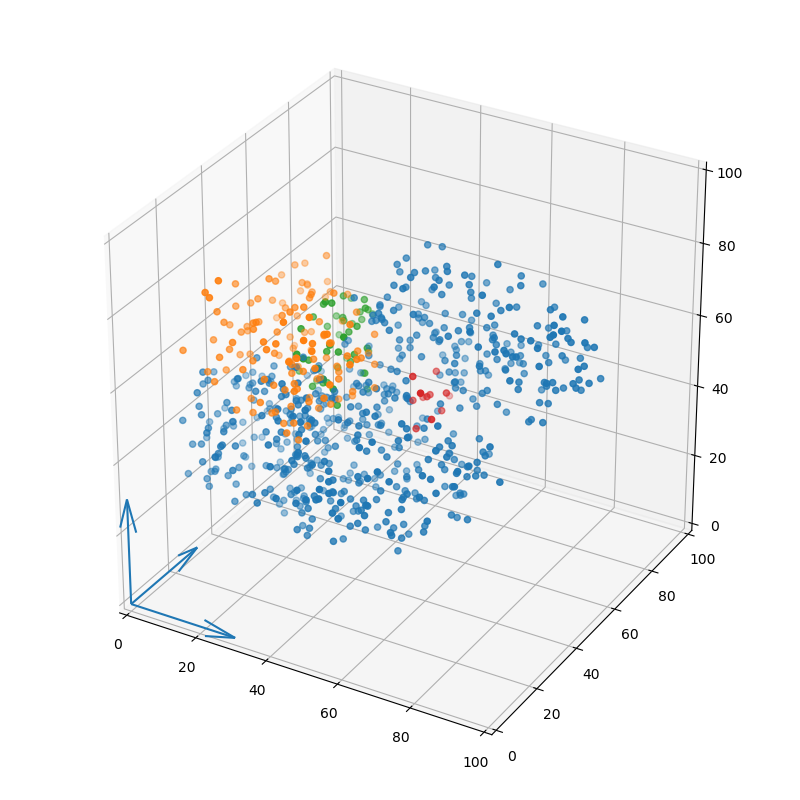

In [28]:
# 3d Scatter Plot of the biggest identified voids

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0,0,0,100,0,0, length=0.3)
ax.quiver(0,0,0,0,100,0, length=0.3)
ax.quiver(0,0,0,0,0,100, length=0.3)

for i in range(MLlen):
    Void = MasterList[i]
    N = len(Void)

    if(N>10): # at least 8 particles per void
        colorin = i * np.ones(N)
        #ax.scatter(Xv, Yv, Zv, c="green", s=10, alpha=0.5, label="True Void Points")
        ax.scatter(X[Void], Y[Void], Z[Void], cmap=cmap.gist_ncar)
        ax.set_xlim(0,100)
        ax.set_ylim(0,100)
        ax.set_zlim(0,100)
        
plt.tight_layout()
plt.savefig( FG_path+"recursion2_big_identified_voids.pdf")